In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }

In [3]:
results_path = '~/sims_n_results/nucmoles_opusupdate_aug2019/'
tamuNoRatio_path = results_path + 'tamuNoRatio/'
tamuRatio_path = results_path + 'tamuRatio/'
sfco_path = results_path + 'sfco/'

uncs = [0.05, 0.1, 0.15, 0.2]
job_dirs = ['Job' + str(i) + '_unc' + str(unc) for i, unc in enumerate(uncs)]
dfs = {}
for i, unc_job in enumerate(job_dirs):
    dfs['dfTamu' + str(i)] = pd.read_csv(tamuNoRatio_path + unc_job + '/' + unc_job + '.csv')
    dfs['dfTamuRatio' + str(i)] = pd.read_csv(tamuRatio_path + unc_job + '/' + unc_job + '.csv')
    dfs['dfSfco' + str(i)] = pd.read_csv(sfco_path + unc_job + '/' + unc_job + '.csv')

In [4]:
dfs.keys()

dict_keys(['dfTamu0', 'dfTamuRatio0', 'dfSfco0', 'dfTamu1', 'dfTamuRatio1', 'dfSfco1', 'dfTamu2', 'dfTamuRatio2', 'dfSfco2', 'dfTamu3', 'dfTamuRatio3', 'dfSfco3'])

In [5]:
for dfname in list(dfs.keys()):
    df = dfs[dfname]
    df['AdjDiff'] = df['MaxLogLL'] - df['2ndMaxLogLL']
    df['RelAdjDiff_MinLL0.01'] = df['AdjDiff'] / df['MaxLogLL']  - df['CDF_LogLL_0.01']
    df['RelAdjDiff_MinLL0.1'] = df['AdjDiff'] / df['MaxLogLL']  - df['CDF_LogLL_0.1']
    df['Percent_Burnup_Error'] = df['Burnup_Error'] / df['Burnup']

In [6]:
def get_cdf(sample):
    ecdf = sm.distributions.ECDF(sample)
    x = np.linspace(min(sample), max(sample))
    y = ecdf(x)
    return x, y

# Relative Adjacent Difference CDFs

$$\frac{MaxLL - AdjLL}{MaxLL - MinLL}$$
$$where$$
$$MinLL = LogLikelihood \, @ \, 1^{th} \, or \, 10^{th} \, percentile$$

In [16]:
def plot_db_cdfs(dfname, metric):

    df0 = dfs['df' + dfname + '0']
    df1 = dfs['df' + dfname + '1']
    df2 = dfs['df' + dfname + '2']
    df3 = dfs['df' + dfname + '3']
    
    x0, y0 = get_cdf(df0[metric])
    x1, y1 = get_cdf(df1[metric])
    x2, y2 = get_cdf(df2[metric])
    x3, y3 = get_cdf(df3[metric])
    
    plt.clf()
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    
    ax.plot(x0, y0, 'o-', color=colors['MBrwn'], mew=0, ms=5, label="5% Uncertainty")
    ax.plot(x1, y1, 'o-', color=colors['MTeal'], mew=0, ms=5, label="10% Uncertainty")
    ax.plot(x2, y2, 'o-', color=colors['MPurp'], mew=0, ms=5, label="15% Uncertainty")
    ax.plot(x3, y3, 'o-', color=colors['DBrwn'], mew=0, ms=5, label="20% Uncertainty")
    
    ax.tick_params(labelsize=14)
    ax.legend(loc='best')
    
    metrictitle = {'RelAdjDiff_MinLL0.01': ['Relative Adjacent Difference', 'MinLL is 1th %ile'], 
                   'RelAdjDiff_MinLL0.1': ['Relative Adjacent Difference', 'MinLL is 10th %ile'], 
                   'Percent_Burnup_Error' : ['Relative Burnup Error', 'Burnup Error']}
    dftitle = {'Tamu': '15 Iso DB', 'TamuRatio': '10 Ratio DB', 'Sfco' : 'SFCOMPO'}

    ax.set_xlabel(metrictitle[metric][0], fontsize=20, labelpad=15)
    ax.set_ylabel('CDF', fontsize=20, labelpad=15)
    
    title_str = 'CDF for ' + dftitle[dfname] + ' predictions'
    subtitle_str = metrictitle[metric][1]
    plt.suptitle(title_str, y=1.01, fontsize=15)
    plt.title(subtitle_str, fontsize=15, pad=15)
    
    #ax.set_xlim(0, 250)
    plt.show()
    
    #fig.savefig('../plots/xxx_cdf_' + dfname + '.png', bbox_inches='tight', transparent=True)

In [69]:
def plot_rxtr_cdfs(dfname, metric):

    df0 = dfs['df' + dfname + '0']
    df1 = dfs['df' + dfname + '1']
    df2 = dfs['df' + dfname + '3']
    
    x0_pwr, y0_pwr = get_cdf(df0[metric].loc[df0['ReactorType'] == 'pwr'])
    x0_bwr, y0_bwr = get_cdf(df0[metric].loc[df0['ReactorType'] == 'bwr'])
    x0_hwr, y0_hwr = get_cdf(df0[metric].loc[df0['ReactorType'] == 'phwr'])
    x1_pwr, y1_pwr = get_cdf(df1[metric].loc[df1['ReactorType'] == 'pwr'])
    x1_bwr, y1_bwr = get_cdf(df1[metric].loc[df1['ReactorType'] == 'bwr'])
    x1_hwr, y1_hwr = get_cdf(df1[metric].loc[df1['ReactorType'] == 'phwr'])
    x2_pwr, y2_pwr = get_cdf(df2[metric].loc[df2['ReactorType'] == 'pwr'])
    x2_bwr, y2_bwr = get_cdf(df2[metric].loc[df2['ReactorType'] == 'bwr'])
    x2_hwr, y2_hwr = get_cdf(df2[metric].loc[df2['ReactorType'] == 'phwr'])
    
    plt.clf()
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
 
    ax.plot(x0_pwr, y0_pwr, 'o-', color=colors['LBrwn'], mew=0, ms=5, label="PWR, 5% Uncertainty")
    ax.plot(x1_pwr, y1_pwr, 'o-', color=colors['MBrwn'], mew=0, ms=5, label="PWR, 10% Uncertainty")
    ax.plot(x2_pwr, y2_pwr, 'o-', color=colors['DBrwn'], mew=0, ms=5, label="PWR, 20% Uncertainty")
    
    ax.plot(x0_bwr, y0_bwr, 'o-', color=colors['LTeal'], mew=0, ms=5, label="BWR, 5% Uncertainty")
    ax.plot(x1_bwr, y1_bwr, 'o-', color=colors['MTeal'], mew=0, ms=5, label="BWR, 10% Uncertainty")
    ax.plot(x2_bwr, y2_bwr, 'o-', color=colors['DTeal'], mew=0, ms=5, label="BWR, 20% Uncertainty")
    
    ax.plot(x0_hwr, y0_hwr, 'o-', color=colors['LPurp'], mew=0, ms=5, label="PHWR, 5% Uncertainty")
    ax.plot(x1_hwr, y1_hwr, 'o-', color=colors['MPurp'], mew=0, ms=5, label="PHWR, 10% Uncertainty")
    ax.plot(x2_hwr, y2_hwr, 'o-', color=colors['DPurp'], mew=0, ms=5, label="PHWR, 20% Uncertainty")
    
    ax.tick_params(labelsize=14)
    ax.legend(loc='best')
    
    title_dict = {'RelAdjDiff_MinLL0.01': ['Relative Adjacent Difference', 'MinLL is 1th %ile'], 
                  'RelAdjDiff_MinLL0.1': ['Relative Adjacent Difference', 'MinLL is 10th %ile'], 
                  'Percent_Burnup_Error' : ['Relative Burnup Error', 'Burnup Error']}
    dftitle = {'Tamu': '15 Iso DB', 'TamuRatio': '10 Ratio DB', 'Sfco' : 'SFCOMPO'}

    ax.set_xlabel(title_dict[metric][0], fontsize=20, labelpad=15)
    ax.set_ylabel('CDF', fontsize=20, labelpad=15)
    
    title_str = 'CDF for ' + dftitle[dfname] + ' predictions'
    subtitle_str = title_dict[metric][1]
    plt.suptitle(title_str, y=1.01, fontsize=15)
    plt.title(subtitle_str, fontsize=15, pad=15)
    
    #ax.set_xlim(0, 250)
    plt.show()
    
    #fig.savefig('../plots/xxx_cdf_' + dfname + '.png', bbox_inches='tight', transparent=True)

## 15 Iso DB

<Figure size 432x288 with 0 Axes>

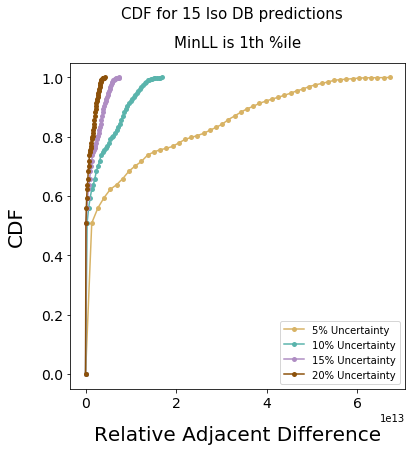

<Figure size 432x288 with 0 Axes>

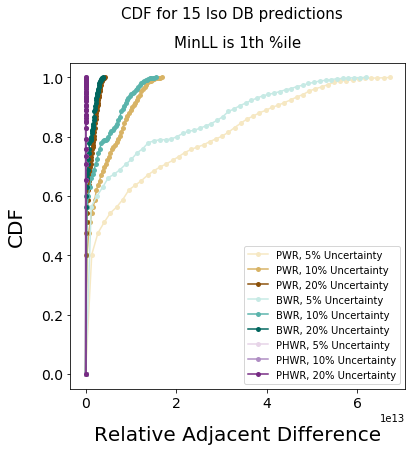

In [66]:
plot_db_cdfs('Tamu', 'RelAdjDiff_MinLL0.01')
plot_rxtr_cdfs('Tamu', 'RelAdjDiff_MinLL0.01')

## 10 Iso Ratio DB

<Figure size 432x288 with 0 Axes>

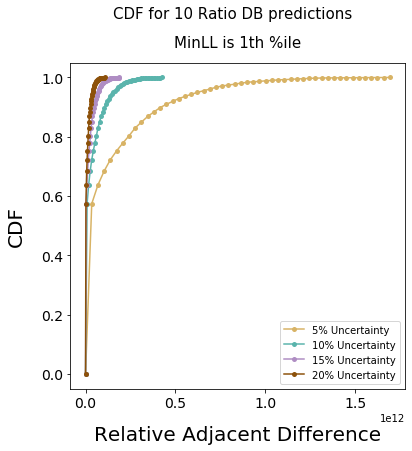

<Figure size 432x288 with 0 Axes>

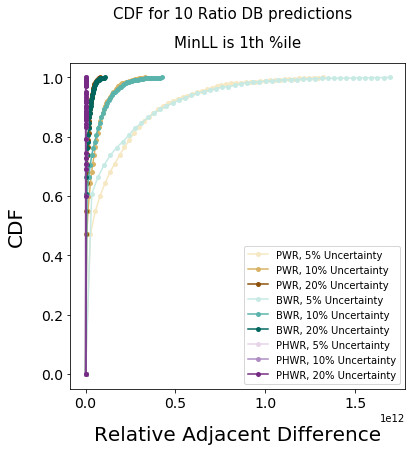

In [67]:
plot_db_cdfs('TamuRatio', 'RelAdjDiff_MinLL0.01')
plot_rxtr_cdfs('TamuRatio', 'RelAdjDiff_MinLL0.01')

## SFCOMPO test set

<Figure size 432x288 with 0 Axes>

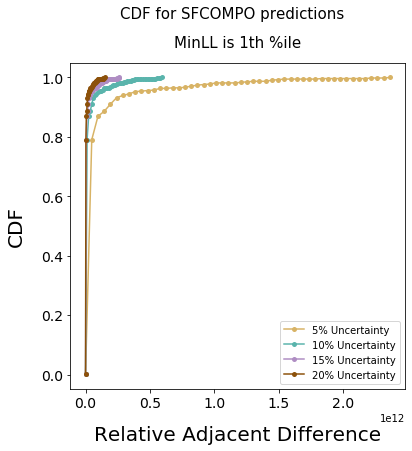

<Figure size 432x288 with 0 Axes>

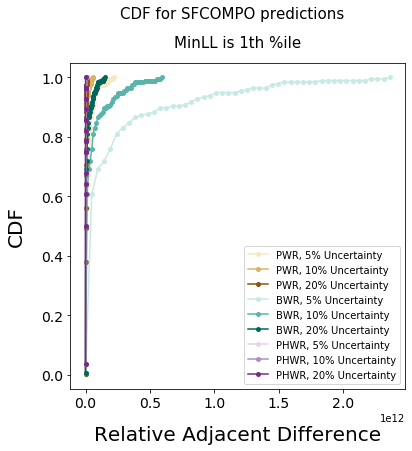

In [68]:
plot_db_cdfs('Sfco', 'RelAdjDiff_MinLL0.01')
plot_rxtr_cdfs('Sfco', 'RelAdjDiff_MinLL0.01')

# Relative Error CDFs

## Burnup

<Figure size 432x288 with 0 Axes>

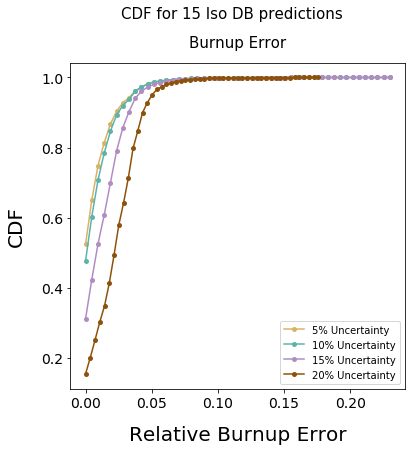

<Figure size 432x288 with 0 Axes>

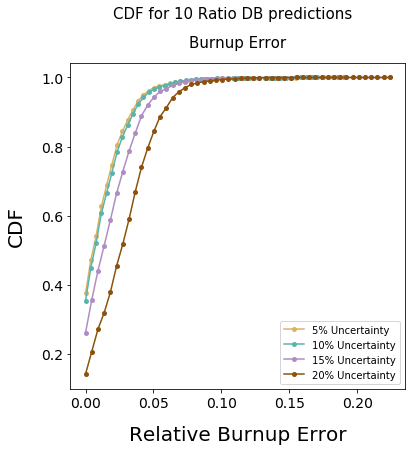

<Figure size 432x288 with 0 Axes>

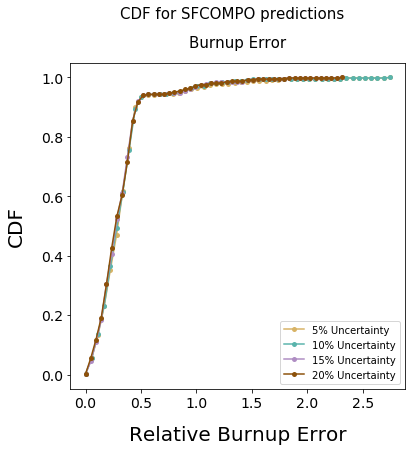

In [17]:
plot_db_cdfs('Tamu', 'Percent_Burnup_Error')
plot_db_cdfs('TamuRatio', 'Percent_Burnup_Error')
plot_db_cdfs('Sfco', 'Percent_Burnup_Error')

## Cooling Time

In [18]:
# in progress

# SFCOMPO Exploration

In [20]:
def plot_scatter(dfname, metric):
    
    df0 = dfs['df' + dfname + '0']
    df1 = dfs['df' + dfname + '1']
    df2 = dfs['df' + dfname + '2']
    df3 = dfs['df' + dfname + '3']
    
    rel_err = 'Percent_' + metric + '_Error' 
    x0, y0 = df0[rel_err], df0[metric]
    x1, y1 = df1[rel_err], df1[metric]
    x2, y2 = df2[rel_err], df2[metric]
    x3, y3 = df3[rel_err], df3[metric]
    
    plt.clf()
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    
    ax.scatter(x0, y0, s=5, color=colors['MBrwn'], label="5% Uncertainty")
    #ax.scatter(x1, y1, s=5, color=colors['MTeal'], label="10% Uncertainty")
    #ax.scatter(x2, y2, s=5, color=colors['MPurp'], label="15% Uncertainty")
    ax.scatter(x3, y3, s=5, color=colors['DBrwn'], label="20% Uncertainty")
    
    ax.tick_params(labelsize=14)
    ax.legend(loc='best')
    
    title_dict = {'Burnup': ['Relative Burnup Error', 'Known Burnup [MWd/THM]'], 
                  }
    dftitle = {'Tamu': '15 Iso DB', 'TamuRatio': '10 Ratio DB', 'Sfco' : 'SFCOMPO'}

    ax.set_xlabel(title_dict[metric][0], fontsize=20, labelpad=15)
    ax.set_ylabel(title_dict[metric][1], fontsize=20, labelpad=15)
    
    title_str = metric + ' Scatterplot'
    subtitle_str = dftitle[dfname] + ' predictions'
    plt.suptitle(title_str, y=1.01, fontsize=15)
    plt.title(subtitle_str, fontsize=15, pad=15)
    
    plt.show()
    
    #fig.savefig('../plots/burnerr_scatter_' + dfname + '.png', bbox_inches='tight', transparent=True)

## Burnup

<Figure size 432x288 with 0 Axes>

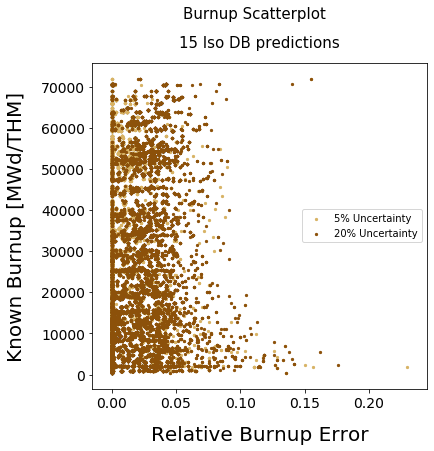

<Figure size 432x288 with 0 Axes>

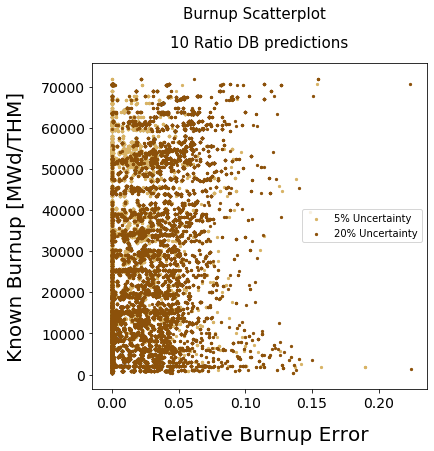

In [22]:
plot_scatter('Tamu', 'Burnup')
plot_scatter('TamuRatio', 'Burnup')

<Figure size 432x288 with 0 Axes>

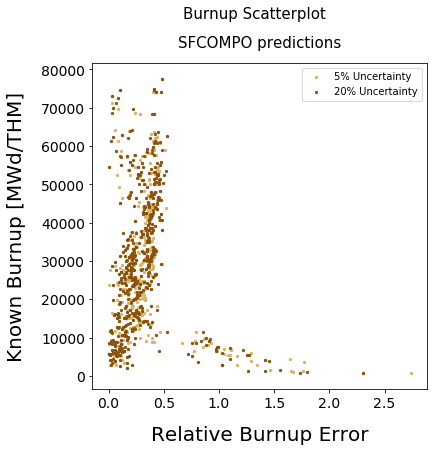

In [23]:
plot_scatter('Sfco', 'Burnup')

### Explore high-error SFCOMPO cases:

Note all (edit: most) predictions with relative burnup error > 1 are low burnup PHWR @ 0 cooling time

In [26]:
to_print = ['sim_idx', 'ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor', 'pred_idx', 'pred_ReactorType', 'pred_CoolingTime', 'pred_Enrichment', 'pred_Burnup', 'ReactorType_Score', 'CoolingTime_Error', 'Enrichment_Error', 'Burnup_Error', 'Percent_Burnup_Error']
dfs['dfSfco0'].loc[dfs['dfSfco0']['Percent_Burnup_Error'] > 1.0, to_print]

,sim_idx,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor,pred_idx,pred_ReactorType,pred_CoolingTime,pred_Enrichment,pred_Burnup,ReactorType_Score,CoolingTime_Error,Enrichment_Error,Burnup_Error,Percent_Burnup_Error
36,FDN-2|2F2DN23|SF98|1,bwr,0.0,0.710,4150.0,Fukushima-Daini-2_BWR,11243,bwr,1.027789,0.500,10045.28,True,1.027789,0.210,5895.28,1.420549
59,FDN-2|2F2DN23|SF99|10,bwr,0.0,0.710,7190.0,Fukushima-Daini-2_BWR,48,pwr,8.460400,0.530,15086.61,False,8.460400,0.180,7896.61,1.098277
267,NPD-1|1022|A|1,phwr,0.0,0.711,791.0,Nuclear Power Demonstration Reactor-1_CANDU,20194,bwr,5253.205150,1.360,2961.22,False,5253.205150,0.649,2170.22,2.743641
268,NPD-1|1022|B|1,phwr,0.0,0.711,854.0,Nuclear Power Demonstration Reactor-1_CANDU,14605,bwr,4998.711783,2.160,2826.34,False,4998.711783,1.449,1972.34,2.309532
269,NPD-1|1022|C|1,phwr,0.0,0.711,1059.0,Nuclear Power Demonstration Reactor-1_CANDU,14362,bwr,4998.711783,1.400,2826.34,False,4998.711783,0.689,1767.34,1.668876
270,NPD-1|1129|A|1,phwr,0.0,0.711,1223.0,Nuclear Power Demonstration Reactor-1_CANDU,18736,bwr,4373.508561,1.620,3244.15,False,4373.508561,0.909,2021.15,1.652617
271,NPD-1|1129|B|1,phwr,0.0,0.711,1306.0,Nuclear Power Demonstration Reactor-1_CANDU,196,pwr,3315.830539,1.410,3609.51,False,3315.830539,0.699,2303.51,1.763790
272,NPD-1|1129|C|1,phwr,0.0,0.711,1622.0,Nuclear Power Demonstration Reactor-1_CANDU,6856,pwr,4825.331343,1.910,3987.23,False,4825.331343,1.199,2365.23,1.458218
273,NPD-1|1630|A|1,phwr,0.0,0.711,2733.0,Nuclear Power Demonstration Reactor-1_CANDU,17052,bwr,1992.053529,0.540,5915.89,False,1992.053529,0.171,3182.89,1.164614
274,NPD-1|1630|B|1,phwr,0.0,0.711,2733.0,Nuclear Power Demonstration Reactor-1_CANDU,24,pwr,2188.354537,0.530,6414.74,False,2188.354537,0.181,3681.74,1.347142
